In [54]:
import cv2
import numpy as np
from PIL import Image
from solvers.consts import *


# import pytesseract
import os 


def showImg(mat):
    rgbMAT = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)

    return Image.fromarray(rgbMAT)

def showMultipleImg(mats):
    from matplotlib import pyplot as plt
    def inner(x):
        x1 = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
        return Image.fromarray(x1) 
    
    l = list(map(inner, mats))
    for p in l:
        plt.figure()
        plt.imshow(p)
    

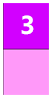

In [55]:

# cv recog coloured blocks
target_color = ['blue', 'pink', 'grey','orange', 'purple', 'green']
# 调色盘
color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},
              'blue': {'Lower': np.array([200, 0, 0]), 'Upper': np.array([255, 120, 100])},
              'pink': {'Lower': np.array([200, 110, 230]), 'Upper': np.array([251, 155, 255])},
              'grey': {'Lower': np.array([150, 150, 150]), 'Upper': np.array([155, 155, 155])},
              'orange': {'Lower': np.array([0, 126, 253]), 'Upper': np.array([5, 170, 255])},
              'purple': {'Lower': np.array([230, 0, 130]), 'Upper': np.array([255, 5, 215])},
              'green': {'Lower': np.array([0 , 128   ,0]), 'Upper': np.array([100, 255, 100])},
              'black': {'Lower': np.array([252, 252, 252]), 'Upper': np.array([255,255,255])},
              }

# path = 'imgs/card_14.png'
path = 'testout_0.png'
img = cv2.imread(path)
showImg(img)

In [56]:
color2terrain = {
    "purple" : HERMITS,
    "green": FOREST,
    "orange": PLAINS,
    "blue": RIVER,
    "pink": VILLIAGE,
    "grey": ROAD,
}
text2terrain = {
    '隐者': HERMITS,
    '森林': FOREST,
    '道路': ROAD,
    '河流': RIVER,
    '村庄': VILLIAGE,
    '平原': PLAINS,
}

text2clue = {
    '隐士': CLUE_HERMIT,
    '飞鸟': CLUE_BIRD,
    '树灵': CLUE_DRYAD,
    '极目': CLUE_OVERLOOK
} 

In [57]:
from paddleocr import PaddleOCR

# Paddleocr目前支持的多语言语种可以通过修改lang参数进行切换
# 例如`ch`, `en`, `fr`, `german`, `korean`, `japan`

def ocr(img_path = './imgs/card_0.png'):
    ocr = PaddleOCR(use_angle_cls=True, lang="ch")  # need to run only once to download and load model into memory

    result = ocr.ocr(img_path, cls=True)
    texts = []
    for idx in range(len(result)):
        res = result[idx]
        for line in res:
            text = line[1][0]
            # print("line:", line[1][0])
            texts.append(text)
    return texts

texts = ocr(path)
print(texts)
clueType = -1
for txt in texts:
    if txt in text2clue.keys():
        clueType = text2clue[txt]
    
print(clueType)


[2024/03/16 23:39:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/zhengjy/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/zhengjy/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

[2024/03/16 23:39:34] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.014218330383300781
[2024/03/16 23:39:34] ppocr DEBUG: cls num  : 1, elapsed : 0.0170896053314209
[2024/03/16 23:39:34] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03563737869262695
['3']
-1


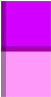

In [58]:
# preprocessing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 高斯模糊
# afterGsB = cv2.GaussianBlur(img, (3,3), 0)
afterGsB = img

# afterDilate = cv2.dilate(afterGsB, kernel, iterations=3)
afterDilate = afterGsB
afterErode = cv2.erode(afterDilate, kernel, iterations=2)
# afterErode = afterDilate
# afterGsB = img
showImg(afterErode)

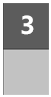

In [59]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImg(gray)

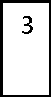

In [60]:
_, thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY_INV)
showImg(thresh)

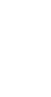

In [61]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.dilate(thresh, kernel, iterations=2)
erode = cv2.erode(dilate, kernel, iterations=4)

showImg(erode)

In [62]:
# contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# rois = []
# for cont in contours:
#     x, y, w, h = cv2.boundingRect(cont)
#     # region of interest
#     roi = gray[y:y+h, x: x+w]
#     rois.append(roi)
    

# # showImg(rois[1])
# showMultipleImg(rois)

In [63]:
# for roi in rois:
#     text = pytesseract.image_to_string(roi, lang='chi_sim')
#     print(text)


In [64]:
# 色调（H），饱和度（S），明度（V）
# afterHSV = cv2.cvtColor(afterGsB, cv2.COLOR_BGR2HSV)
# showImg(afterHSV)


In [65]:
# 粗线条的变细
# afterErode = cv2.erode(afterHSV, None, iterations = 2)
# showImg(afterErode)

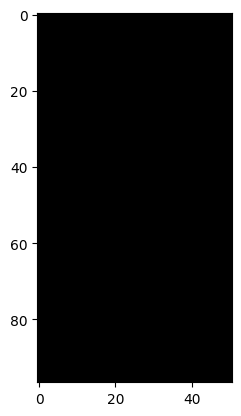

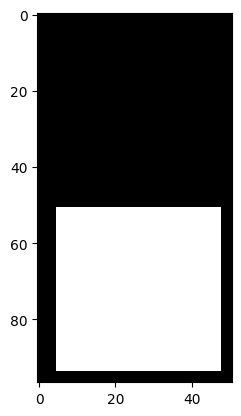

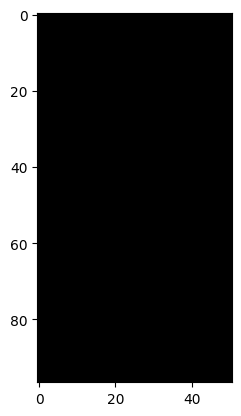

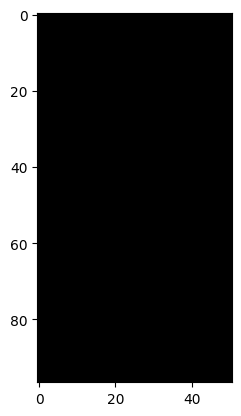

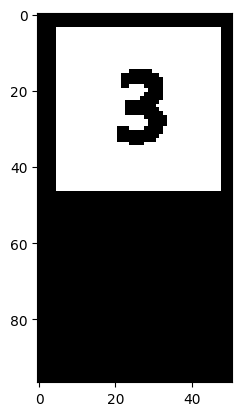

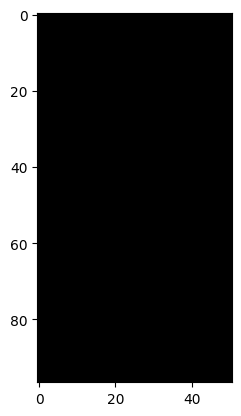

In [66]:
masks = []
colors = []
for color in target_color:
    mask = cv2.inRange(img, color_dist[color]['Lower'], color_dist[color]['Upper'])
    masks.append(mask)
    colors.append(color)

showMultipleImg(masks)

In [67]:
EPSILON = 5
roi_masks = []
for mask in masks:
     
    contours, _ = cv2.findContours(mask, 
                                    cv2.RETR_EXTERNAL, 
                                    cv2.CHAIN_APPROX_SIMPLE)
    
    rois = []
    for cont in contours:
        x, y, w, h = cv2.boundingRect(cont)
        # add region of interest
        m = (x, y, w, h)
        if(w > EPSILON and h > EPSILON):
            print(m)
            rois.append(m)
        
    roi_masks.extend(rois)

coors = list(map(lambda roi: (roi[0], roi[1]), roi_masks))


print(coors)

(5, 51, 43, 43)
(5, 4, 43, 43)
[(5, 51), (5, 4)]


In [68]:
raw = roi_masks

def unify(raw:list[tuple])->list[tuple]:
    xcoors = list(map(lambda roi: roi[0], raw))
    ycoors = list(map(lambda roi: roi[1], raw))
    
    def denoise(x):
        xcoors = [_ for _ in x]
        for i, c1 in enumerate(xcoors):
            for j in range(i, len(xcoors)):
                c2 = xcoors[j]
                if abs(c1 - c2) < EPSILON:
                    m = min(c1, c2)
                    xcoors[i] = m
                    xcoors[j] = m
        return xcoors

    xcoors = denoise(xcoors)
    ycoors = denoise(ycoors)
    print(xcoors, ycoors)
    def snd_min(A):
        Ap = sorted(set(A))
        return Ap[1] if len(Ap) > 1 else Ap[0]


    def unify_inner(A):
        sndm = snd_min(A)
        m = min(A)
        # print(sndm,m)
        
        # !!! divided by zero
        
        offst = 1 if sndm - m == 0 else sndm - m
        return list(map(lambda x: (x - m) // offst, A))
        
    # print(xcoors)
    r = list(zip(unify_inner(ycoors), unify_inner(xcoors)))

    return r

unify(raw=raw)

[5, 5] [51, 4]


[(1, 0), (0, 0)]

In [69]:
import cv2

def crop_image(img, crop_percentage):
    height, width, _ = img.shape

    left = int(width * crop_percentage / 100)
    top = int(height * crop_percentage / 100)
    right = int(width * (1 - crop_percentage / 100))
    bottom = int(height * (1 - crop_percentage / 100))

    cropped_img = img[top:bottom, left:right]

    return cropped_img


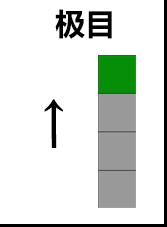

In [76]:
import cv2
import numpy as np

def preprocess(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1)
    img_canny = cv2.Canny(img_blur, 50, 50)
    kernel = np.ones((3, 3))
    img_dilate = cv2.dilate(img_canny, kernel, iterations=2)
    img_erode = cv2.erode(img_dilate, kernel, iterations=1)
    return img_erode

def find_tip(points, convex_hull):
    length = len(points)
    indices = np.setdiff1d(range(length), convex_hull)

    for i in range(2):
        j = indices[i] + 2
        if j > length - 1:
            j = length - j
        if np.all(points[j] == points[indices[i - 1] - 2]):
            return tuple(points[j])

img = cv2.imread("imgs/card_18.png")

contours, hierarchy = cv2.findContours(preprocess(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.025 * peri, True)
    hull = cv2.convexHull(approx, returnPoints=False)
    sides = len(hull)

    if sides > 3 and sides + 2 == len(approx):    
        arrow_tip = find_tip(approx[:,0,:], hull.squeeze())
        if arrow_tip:
            cv2.drawContours(img, [cnt], -1, (0, 255, 0), 3)
            cv2.circle(img, arrow_tip, 3, (0, 0, 255), cv2.FILLED)


93 23
80 18
53 100
65 15
106 23
163 223
69 35
DOWN


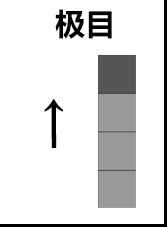

In [75]:
img = cv2.imread('imgs/card_18.png')
# img = cv2.GaussianBlur(img, (11,11), 0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,7,0.01,10)
corners = np.int0(corners)

ct='a'
for i in corners:
    x,y = i.ravel()
    print(x,y)
    cv2.circle(img,(x,y),3,(255,255,0),-1)
    cv2.putText(img, ct, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2, cv2.LINE_AA )
    ct=ct+'a'

xmax, ymax = (np.max(corners, axis = 0)).ravel()
xmin, ymin = (np.min(corners, axis = 0)).ravel() 

   
if( abs(xmax-xmin) > abs(ymax-ymin)):
    if(np.count_nonzero(corners[:,0,0] == xmax) == 2):
        print('LEFT')
    else:
        print('RIGHT')
else:
    if(np.count_nonzero(corners[:,0,1] == ymax) == 2):
        print('UP')
    else:
        print('DOWN')   

showImg(gray)